Gold Price Prediction

In [20]:
import pandas as pd
# import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import accuracy_score

In [21]:
gold_dataset = pd.read_csv("./gld_price_data.csv")
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
gold_dataset.shape

(2290, 6)

In [23]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [24]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [25]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [26]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Correlation
 - Positive - Directly Proportional
 - Negative - Inversely Proportional

In [27]:
correlation = gold_dataset.corr()

C:\Users\lunat\AppData\Local\Temp\ipykernel_20300\4191627151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

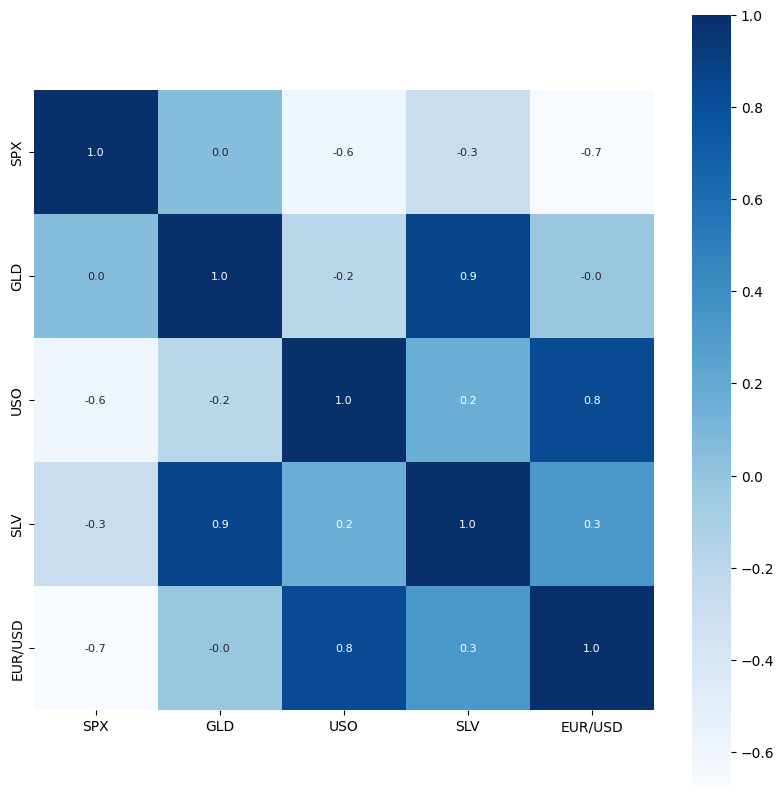

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws = {'size':8}, cmap='Blues')

In [29]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\lunat\AppData\Local\Temp\ipykernel_20300\1916048035.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

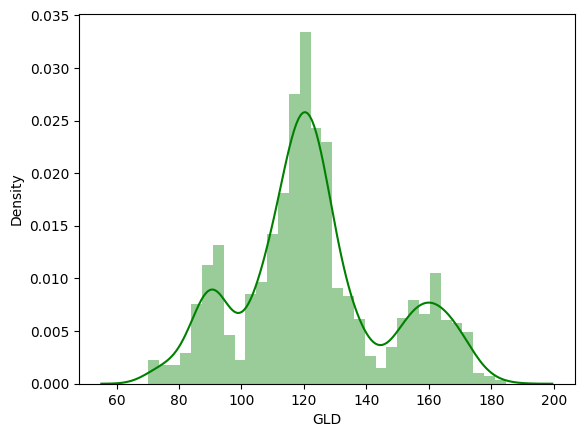

In [30]:
# CHeck the distribution of the gold price
sns.distplot(gold_dataset['GLD'], color='green')

In [31]:
X = gold_dataset.drop(['Date','GLD'], axis=1)
Y = gold_dataset['GLD']

print(X)
print(Y)

X.shape
Y.shape

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


(2290,)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

#### Model Evaluation

In [35]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.72189918  81.91909971 116.08130005 127.55170051 120.76450121
 154.58039826 150.24419844 126.18640051 117.38209881 125.98700089
 116.44690105 171.19810072 142.1482984  168.12899825 115.06889984
 117.31470037 139.43150284 170.42190126 159.41480354 158.20780003
 155.0448005  125.41330005 175.58849973 157.64530337 125.22200047
  93.80949956  78.08439985 120.38349999 119.06949927 167.52479903
  88.10620058 125.21860005  91.14210093 117.63200003 121.14769909
 136.83210027 115.70450142 115.05050107 149.75499987 107.20610124
 104.15570257  87.23209772 126.41520047 117.87630007 153.7840996
 119.50180016 108.42019949 108.01899858  93.30680052 127.26199744
  75.05710048 113.83789934 121.44050015 111.42859903 119.06889902
 120.70789923 159.23399896 167.79940107 146.91619639  86.04519844
  94.5140005   86.80459914  90.58930007 118.75520089 126.42470041
 127.61420001 169.23240042 122.15589957 117.1492989   98.42470007
 167.82680118 143.43739784 132.47120256 121.18650224 120.74109949
 119.654300

In [36]:
#R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Error',error_score)

R Squared Error 0.9886626241586964


### Compare actual values and predicted values

In [37]:
Y_test = list(Y_test)

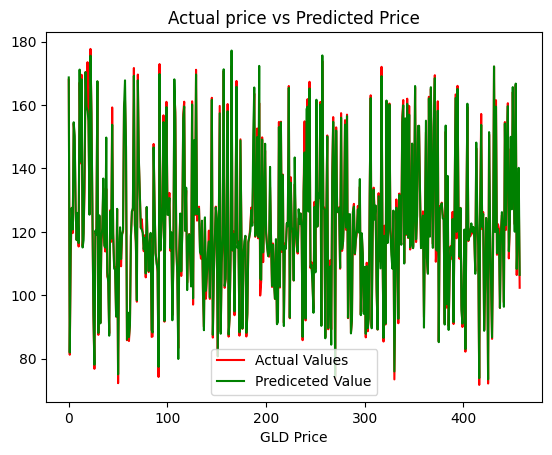

In [38]:
plt.plot(Y_test,color='red', label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label = 'Prediceted Value')
plt.title('Actual price vs Predicted Price')
plt.xlabel('Number of values')
plt.xlabel('GLD Price')
plt.legend()
plt.show()